In [1]:
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import pandas as pd
from scipy.optimize import curve_fit

analysisdir = 'F:/LANL/analysis/3he_analysis/'
basedir = os.path.dirname(os.path.dirname(os.path.dirname(analysisdir)))+'/'
print(basedir)
print(analysisdir)
os.chdir(basedir)
datdir = basedir+'3he_data/'
print(datdir)

F:/LANL/
F:/LANL/analysis/3he_analysis/
F:/LANL/3he_data/


In [2]:
tup_loc = datdir+'pumpup_SF.txt'
tdn_loc = datdir+'pump_down_3.txt'

tup_df = pd.read_csv(tup_loc, sep = '\t')
tdn_df = pd.read_csv(tdn_loc, sep = '\t')

print(tup_df.keys())
print(tdn_df.keys())

Index(['TimeHistory', 'AmpHistory', 'rateamp', 'ratetime'], dtype='object')
Index(['AmpHistory', 'AmpHistory.1', 'BSDamp', 'BSDampCor', 'BSDfit',
       'BSDtime', 'rateamp', 'ratetime', 'rateamp2', 'ratetime2', 'rateamp3',
       'ratetime3', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19'],
      dtype='object')


In [3]:

rateamp_up = np.array(tup_df['rateamp'])
rateamp_dn = np.array(tdn_df['AmpHistory.1'])
ratetime_up = np.array(tup_df['ratetime'])
ratetime_dn = np.array(tdn_df['ratetime'])

last_i_up = np.where(np.isnan(np.array(rateamp_up))!=True)[0][-1]
last_i_dn = np.where(np.isnan(np.array(rateamp_dn))!=True)[0][-1]
last_i_dn = 671 ##hardcoding this from the xlsx file
first_i_up = 10
# first_i_dn = 22
first_i_dn = 60  ## changed to let the cell cool
print(last_i_up)
print(last_i_dn)

rateamp_up = rateamp_up[first_i_up:last_i_up]
ratetime_up = ratetime_up[first_i_up:last_i_up]
rateamp_up = np.delete(rateamp_up,4)
ratetime_up = np.delete(ratetime_up,4) # found these trouble indices
rateamp_up = np.delete(rateamp_up,413)
ratetime_up = np.delete(ratetime_up,413) # found these trouble indices

rateamp_dn = rateamp_dn[first_i_dn:last_i_dn]
ratetime_dn = ratetime_dn[first_i_dn:last_i_dn]
rateamp_dn = np.delete(rateamp_dn,553)
ratetime_dn = np.delete(ratetime_dn,553) # found these trouble indices

# print(rateamp_up)
# print(len(rateamp_up))
# print(rateamp_up[533])
# print(np.where(np.isnan(np.array(rateamp_up))!=True))
print(ratetime_dn[22])

533
671
25.22626266


In [4]:
# print(rateamp_up[4])
# print(rateamp_up[0:8])
# print(np.delete(rateamp_up,4)[0:8])
print(np.where(rateamp_up<=0.03))
print((np.where(rateamp_dn>=0.08)))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),)
(array([  0,   1,   2,   3,   4,   5,   6,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 157,
       158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170,
       171, 172, 173, 174

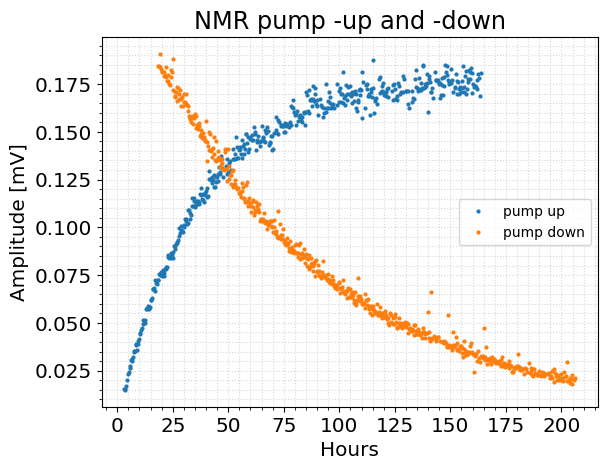

In [5]:
%matplotlib inline
plt.plot(ratetime_up, rateamp_up, ls = '', marker = '.', ms = '4.0', label = 'pump up')
# print(ratetime_dn[798])
plt.plot(ratetime_dn, rateamp_dn, ls = '', marker = '.', ms = '4.0', label = 'pump down')

plt.title(rf'NMR pump -up and -down', fontsize = 'xx-large')

# plt.xticks(np.arange(-1.0,4.0, 0.5),fontsize = 'large')
plt.grid(True, which='both', alpha = 0.5, ls = ':')
plt.minorticks_on()
plt.xticks(fontsize = 'x-large')
plt.yticks(fontsize = 'x-large')

plt.ylabel('Amplitude [mV]',fontsize = 'x-large')
plt.xlabel('Hours',fontsize = 'x-large')

plt.legend(fontsize = 'medium')
plt.show()

In [6]:
# print(rateamp_dn)
print(np.isfinite(rateamp_dn))
print(len(np.isfinite(rateamp_dn)))
print(len(np.isfinite(rateamp_dn[np.isfinite(rateamp_dn)])))

# print(np.isfinite(rateamp_dn))
print(len(ratetime_dn))
print(len(ratetime_dn[np.isfinite(rateamp_dn)]))
# print(rateamp_dn[np.isfinite(rateamp_dn)])
# print(np.isfinite(ratetime_dn)[13])
# print(np.isfinite(ratetime_dn) == np.isfinite(rateamp_dn))
# print(rateamp_dn)


[ True  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True  True  True  True  True  True  T

In [7]:
fin_ra_dn = rateamp_dn[np.isfinite(rateamp_dn)]
fin_rt_dn = ratetime_dn[np.isfinite(rateamp_dn)]
fin_ra_up = rateamp_up[np.isfinite(rateamp_up)]
fin_rt_up = ratetime_up[np.isfinite(rateamp_up)]
print(len(fin_ra_dn),len(fin_ra_up),len(fin_rt_dn),len(fin_rt_up))

561 471 561 471


In [8]:
print(fin_ra_dn[2:30])
print(fin_rt_dn[2:30])

[0.19073889 0.1840068  0.18266548 0.18131286 0.18194926 0.18148123
 0.17933781 0.17965327 0.183819   0.17865336 0.1765583  0.17957668
 0.17678565 0.17521842 0.17473707 0.18254739 0.17872612 0.18120068
 0.1883041  0.17161019 0.17157066 0.16828634 0.16855249 0.17106563
 0.16597614 0.17350465 0.17270568 0.16695948]
[19.07354208 19.3811781  19.68881413 19.99645016 20.30408619 20.91935825
 21.22699428 21.53463031 21.84226634 22.14990237 22.4575384  22.76517443
 23.07281046 23.38044649 23.68808252 23.99571855 24.30335458 24.6109906
 24.91862663 25.22626266 25.53389869 25.84153472 26.14917075 26.45680678
 26.76444281 27.07207884 27.37971487 27.6873509 ]


tau_down 78.98244


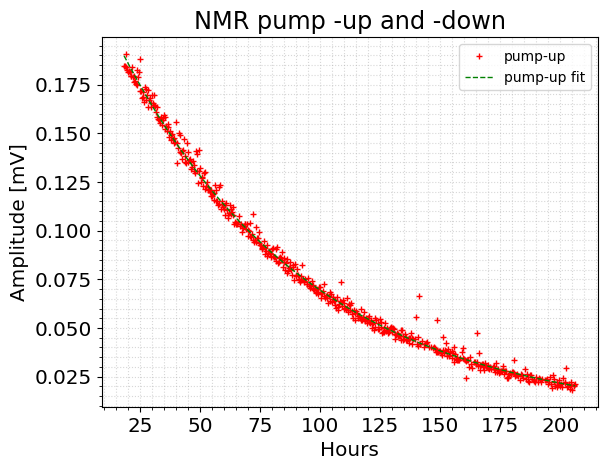

In [9]:
## plot pump down
def func_exp(x, a, t, c): ## tau is t
    return a * np.exp(x/-t) + c

# x = np.linspace(0,4,50)
# y = func_exp(x, 2.5, 1.3, 0.5)
# yn = y + 0.2*np.random.normal(size=len(x))
x = fin_rt_dn
yn = fin_ra_dn

popt, pcov = curve_fit(func_exp, x, yn, p0 = [0.255, 80,0])

plt.figure()
plt.plot(x, yn, 'r+', ms = '4.0', label = 'pump-up')
plt.plot(x, func_exp(x, *popt), 'g--', lw = '1.0', label='pump-up fit')
# f'{a:.20f}'
# '{:f}'.format(a)
td = np.round(popt,5)
print('tau_down '+'{:.5f}'.format(td[1]))

plt.title(rf'NMR pump -up and -down', fontsize = 'xx-large')

# plt.xticks(np.arange(-1.0,4.0, 0.5),fontsize = 'large')
plt.grid(True, which='both', alpha = 0.5, ls = ':')
plt.minorticks_on()
plt.xticks(fontsize = 'x-large')
plt.yticks(fontsize = 'x-large')

plt.ylabel('Amplitude [mV]',fontsize = 'x-large')
plt.xlabel('Hours',fontsize = 'x-large')

plt.legend(fontsize = 'medium')
plt.show()

471
471
[0.04877 0.28079]


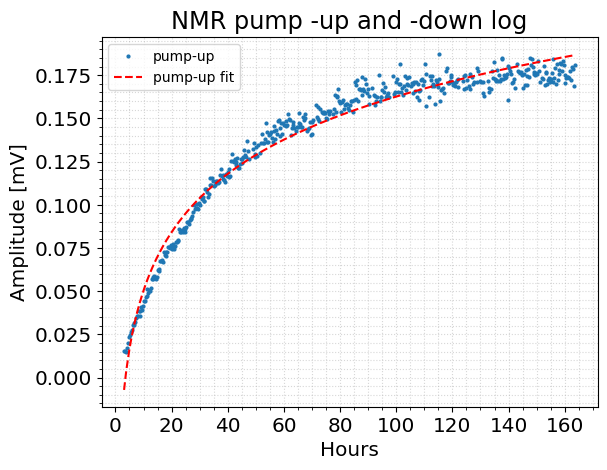

471
471
[-0.17726 36.25394  0.17812]


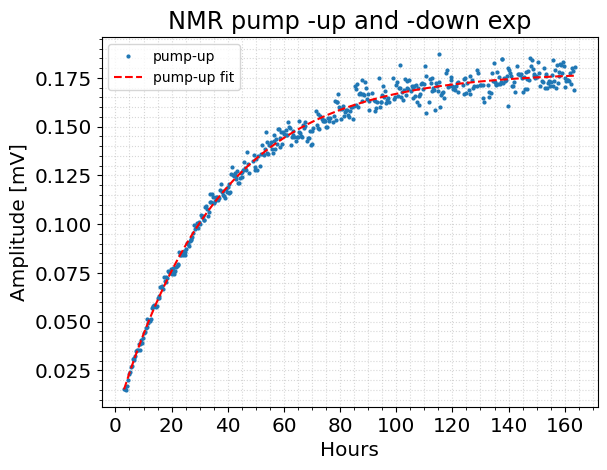

In [10]:
def func_log(x, a, b):
    """Return values from a general log function."""
    return a * np.log(b * x)

x = fin_rt_up
yn = fin_ra_up

popt, pcov = curve_fit(func_log, x, yn, p0 = [0.177, 0.01])
yfit = func_log(x, *popt)
print(len(yn))
print(len(yfit))

plt.figure()
plt.plot(x, yn, '.', ms = '4.0', label = 'pump-up')
plt.plot(x, yfit, 'r--', label='pump-up fit')
print(np.round(popt,5))

plt.title(rf'NMR pump -up and -down log', fontsize = 'xx-large')

# plt.xticks(np.arange(-1.0,4.0, 0.5),fontsize = 'large')
plt.grid(True, which='both', alpha = 0.5, ls = ':')
plt.minorticks_on()
plt.xticks(fontsize = 'x-large')
plt.yticks(fontsize = 'x-large')

plt.ylabel('Amplitude [mV]',fontsize = 'x-large')
plt.xlabel('Hours',fontsize = 'x-large')

plt.legend(fontsize = 'medium')
plt.show()

popt, pcov = curve_fit(func_exp, x, yn, p0 = [0.17, 36, 0.0049])
yfit = func_exp(x, *popt)
print(len(yn))
print(len(yfit))

plt.figure()
plt.plot(x, yn, '.', ms = '4.0', label = 'pump-up')
plt.plot(x, yfit, 'r--', label='pump-up fit')
print(np.round(popt,5))

plt.title(rf'NMR pump -up and -down exp', fontsize = 'xx-large')

# plt.xticks(np.arange(-1.0,4.0, 0.5),fontsize = 'large')
plt.grid(True, which='both', alpha = 0.5, ls = ':')
plt.minorticks_on()
plt.xticks(fontsize = 'x-large')
plt.yticks(fontsize = 'x-large')

plt.ylabel('Amplitude [mV]',fontsize = 'x-large')
plt.xlabel('Hours',fontsize = 'x-large')

plt.legend(fontsize = 'medium')
plt.show()

Reduced Chi-squared: 9.65160178180887e-06
0.005385593794249349
9.65160178180887e-06
0.0031067027186084074
Reduced Chi-squared with errors: 0.9425392365047723
[0.23607 0.01266 0.00292]


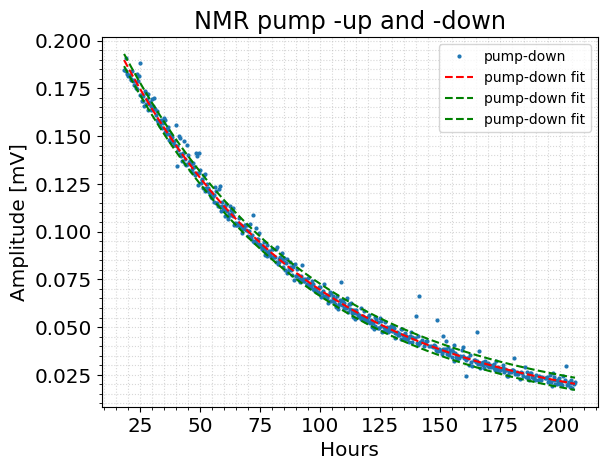

0.0010089586742979208
1.0179976064410177e-06
[4.51782102e-07 1.71076907e-08 5.49107814e-07]


In [11]:
## the reduced chi squared isnt working, but the plots do

from scipy.linalg import inv

def reduced_chi2(ydata, yfit, sigma, p):
    """Calculates the reduced chi-squared statistic."""
    residuals = ydata - yfit
    if sigma is None:
        chi2 = np.sum(residuals**2)
    elif np.ndim(sigma) == 1:
        chi2 = np.sum((residuals / sigma)**2)
    elif np.ndim(sigma) == 2:
        chi2 = residuals.T @ inv(sigma) @ residuals
    else:
      raise ValueError("sigma must be None, 1D, or 2D")

    dof = len(ydata) - len(p)
    return chi2 / dof

# Example usage:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

# xdata = np.linspace(0, 4, 50)
# y = func(xdata, 2.5, 1.3, 0.5)
# np.random.seed(1729)
# y_noise = 0.2 * np.random.normal(size=xdata.size)
# ydata = y + y_noise
xdata = fin_rt_dn
ydata = fin_ra_dn


popt, pcov = curve_fit(func, xdata, ydata, p0 = [0.255, 0.01,0])
yfit = func(xdata, *popt)

reduced_chi_squared = reduced_chi2(ydata, yfit, None, popt)
print(f"Reduced Chi-squared: {reduced_chi_squared}")

# testsig = np.sum(residuals**2)
# sigma = np.ones(len(ydata))*0.00429

err = 0.0032

# plt.figure()
# plt.plot(x, yn, '.', ms = '4.0', label = 'pump-up')
# plt.plot(x, yfit, 'r--', label='pump-up fit')
sigma = np.ones(len(ydata))*err ## estimated 0.0045...

# print(sigma)
residuals = ydata-yfit
# print(residuals)
SSE = np.sum(residuals**2)
print(SSE)
n = 3
dof = len(ydata) - n
MSE = SSE/dof
print(MSE)
se = np.sqrt(MSE)
print(se)
# sigma = np.full_like(ydata, np.sqrt(np.sum(np.abs(residuals))))
# print(sigma)

# residual_variance = np.sum(residuals**2) / dof
# cov_matrix = np.linalg.inv(ATA) * residual_variance
# stderr = np.sqrt(np.diag(cov_matrix))

reduced_chi_squared = reduced_chi2(ydata, yfit, sigma, popt)
print(f"Reduced Chi-squared with errors: {reduced_chi_squared}")

plt.figure()
plt.plot(xdata, ydata, '.', ms = '4.0', label = 'pump-down')
plt.plot(xdata, yfit, 'r--', label='pump-down fit')
plt.plot(xdata, yfit+err, 'g--', label='pump-down fit')
plt.plot(xdata, yfit-err, 'g--', label='pump-down fit')
print(np.round(popt,5))

plt.title(rf'NMR pump -up and -down', fontsize = 'xx-large')

# plt.xticks(np.arange(-1.0,4.0, 0.5),fontsize = 'large')
plt.grid(True, which='both', alpha = 0.5, ls = ':')
plt.minorticks_on()
plt.xticks(fontsize = 'x-large')
plt.yticks(fontsize = 'x-large')

plt.ylabel('Amplitude [mV]',fontsize = 'x-large')
plt.xlabel('Hours',fontsize = 'x-large')

plt.legend(fontsize = 'medium')
plt.show()
print(np.sqrt(np.sum(np.diag(pcov))))
print(np.sqrt(np.sum(np.diag(pcov))**2))
print(np.diag(pcov))

471
471
[-0.17726 36.25394  0.17812]
[[0.000e+00 1.900e-04 0.000e+00]
 [1.900e-04 1.715e-01 1.400e-04]
 [0.000e+00 1.400e-04 0.000e+00]]
Reduced Chi-squared with errors: 0.8771409510854663


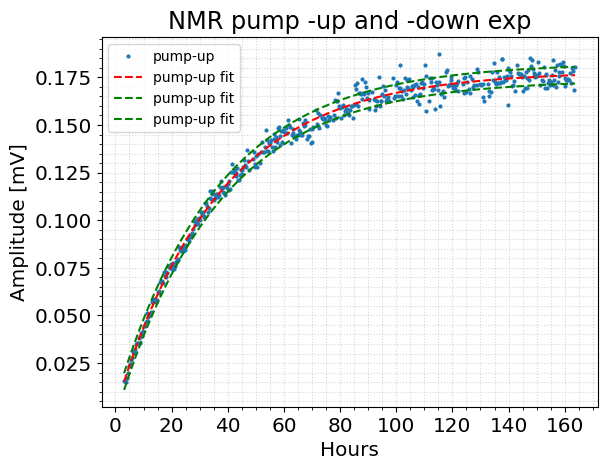

In [12]:
%matplotlib inline
x = fin_rt_up
yn = fin_ra_up
ydata = yn

popt, pcov = curve_fit(func_exp, x, yn, p0 = [0.17, 36, 0.0049])
yfit = func_exp(x, *popt)
print(len(yn))
print(len(yfit))
err = 0.0044

# plt.figure()
plt.plot(x, yn, '.', ms = '4.0', label = 'pump-up')
plt.plot(x, yfit, 'r--', label='pump-up fit')
plt.plot(x, yfit+err, 'g--', label='pump-up fit')
plt.plot(x, yfit-err, 'g--', label='pump-up fit')


print(np.round(popt,5))
print(np.round(pcov,5))

sigma = np.ones(len(ydata))*err ## estimated error...
reduced_chi_squared = reduced_chi2(ydata, yfit, sigma, popt)
print(f"Reduced Chi-squared with errors: {reduced_chi_squared}")

plt.title(rf'NMR pump -up and -down exp', fontsize = 'xx-large')

# plt.xticks(np.arange(-1.0,4.0, 0.5),fontsize = 'large')
plt.grid(True, which='both', alpha = 0.5, ls = ':')
plt.minorticks_on()
plt.xticks(fontsize = 'x-large')
plt.yticks(fontsize = 'x-large')

plt.ylabel('Amplitude [mV]',fontsize = 'x-large')
plt.xlabel('Hours',fontsize = 'x-large')

plt.legend(fontsize = 'medium')
plt.show()

### now all together

<>:25: SyntaxWarning: invalid escape sequence '\c'
<>:67: SyntaxWarning: invalid escape sequence '\c'
<>:25: SyntaxWarning: invalid escape sequence '\c'
<>:67: SyntaxWarning: invalid escape sequence '\c'
C:\Users\gabeo\AppData\Local\Temp\ipykernel_20460\2090967338.py:25: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(x, yfit, 'k--', lw = '1.5', label=f'pump-down fit, $\chi$/ndf = {reduced_chi_squared}, \n'+'$\\tau_{down}$ = '+ '{:.2f}'.format(td[1])+' hours')
C:\Users\gabeo\AppData\Local\Temp\ipykernel_20460\2090967338.py:67: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(x, yfit, 'g--', lw = '2.0', label=f'pump-up fit, $\chi$/ndf = {reduced_chi_squared}, \n'+'$\\tau_{up}$ = '+ '{:.2f}'.format(tu[1])+' hours')


pump down Reduced Chi-squared with errors: 0.943
[2.36100e-01 7.89824e+01 2.90000e-03]
tau_down 78.98240
471
471
pump up Reduced Chi-squared with errors: 0.877
[-0.1773 36.2539  0.1781]
tau_up 36.25390


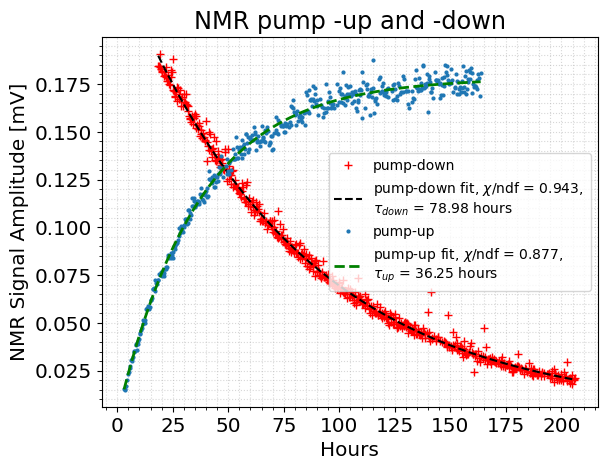

In [13]:
%matplotlib inline 

def func_exp(x, a, t, c): ## tau is t
    return a * np.exp(x/-t) + c

############### increase 

x = fin_rt_dn
yn = fin_ra_dn
ydata = yn

popt, pcov = curve_fit(func_exp, x, yn, p0 = [0.255, 80,0])
yfit = func_exp(x, *popt)
err = 0.0032

sigma = np.ones(len(ydata))*err ## estimated error...
reduced_chi_squared = np.round(reduced_chi2(ydata, yfit, sigma, popt),3)
print(f"pump down Reduced Chi-squared with errors: {reduced_chi_squared}")

td = np.round(popt,4)
print(td)
print('tau_down '+'{:.5f}'.format(td[1]))
plt.figure()
plt.plot(x, yn, 'r+', ms = '6.0', label = 'pump-down')
plt.plot(x, yfit, 'k--', lw = '1.5', label=f'pump-down fit, $\chi$/ndf = {reduced_chi_squared}, \n'+'$\\tau_{down}$ = '+ '{:.2f}'.format(td[1])+' hours')
# print(np.round(popt,5))

# plt.title(rf'NMR pump -up and -down', fontsize = 'xx-large')

# # plt.xticks(np.arange(-1.0,4.0, 0.5),fontsize = 'large')
# plt.grid(True, which='both', alpha = 0.5, ls = ':')
# plt.minorticks_on()
# plt.xticks(fontsize = 'x-large')
# plt.yticks(fontsize = 'x-large')

# plt.ylabel('Amplitude [mV]',fontsize = 'x-large')
# plt.xlabel('Hours',fontsize = 'x-large')

# plt.legend(fontsize = 'medium')
# plt.show()

################## decay

x = fin_rt_up
yn = fin_ra_up
ydata = yn

popt, pcov = curve_fit(func_exp, x, yn, p0 = [0.17, 36, 0.0049])
yfit = func_exp(x, *popt)
print(len(yn))
print(len(yfit))
err = 0.0044


# print(np.round(popt,5))
# print(np.round(pcov,5))

sigma = np.ones(len(ydata))*err ## estimated error...
reduced_chi_squared = np.round(reduced_chi2(ydata, yfit, sigma, popt),3)
print(f"pump up Reduced Chi-squared with errors: {reduced_chi_squared}")

tu = np.round(popt,4)
print(tu)
print('tau_up '+'{:.5f}'.format(tu[1]))
# plt.figure()
plt.plot(x, yn, '.', ms = '4.0', label = 'pump-up')
plt.plot(x, yfit, 'g--', lw = '2.0', label=f'pump-up fit, $\chi$/ndf = {reduced_chi_squared}, \n'+'$\\tau_{up}$ = '+ '{:.2f}'.format(tu[1])+' hours')

plt.title(rf'NMR pump -up and -down', fontsize = 'xx-large')

# plt.xticks(np.arange(-1.0,4.0, 0.5),fontsize = 'large')
plt.grid(True, which='both', alpha = 0.5, ls = ':')
plt.minorticks_on()
plt.xticks(fontsize = 'x-large')
plt.yticks(fontsize = 'x-large')

plt.ylabel('NMR Signal Amplitude [mV]',fontsize = 'x-large')
plt.xlabel('Hours',fontsize = 'x-large')

plt.legend(fontsize = 'medium')
plt.show()

In [14]:
## try the general form of chi^2/ndf:
import numpy as np

def chi_square_dof(fit_func, xdata, ydata, popt, sigma=None):
    """
    Calculate chi-square and degrees of freedom for a fit.

    Parameters:
        fit_func : callable
            The model function, f(x, ...).
        xdata : array_like
            The independent variable where the data is measured.
        ydata : array_like
            The dependent data — measured values.
        popt : array_like
            Optimal values for the parameters from curve_fit.
        sigma : array_like or None
            Standard deviation errors of ydata. If None, equal weights assumed.

    Returns:
        chi2 : float
            Chi-square statistic.
        dof : int
            Degrees of freedom.
        reduced_chi2 : float
            Reduced chi-square (chi2 / dof)
    """
    yfit = fit_func(xdata, *popt)
    residuals = ydata - yfit
    if sigma is None:
        chi2 = np.sum(residuals**2)
    else:
        chi2 = np.sum((residuals / sigma)**2)
    dof = len(ydata) - len(popt)
    reduced_chi2 = chi2 / dof
    return chi2, dof, reduced_chi2


x = fin_rt_up
yn = fin_ra_up
ydata = yn
err = 0.0044

popt, pcov = curve_fit(func_exp, x, yn, p0 = [0.17, 36, 0.0049])
yfit = func_exp(x, *popt)

print(len(yn))
print(len(yfit))

sigma_old = np.ones(len(ydata))*err ## estimated error...
reduced_chi_squared = np.round(reduced_chi2(ydata, yfit, sigma_old, popt),3)
print(f"pump up Reduced Chi-squared with errors: {reduced_chi_squared}")

testchi = chi_square_dof(func_exp, x, yn, popt, sigma=sigma_old)
print(f"test general chi: {testchi}")


471
471
pump up Reduced Chi-squared with errors: 0.877
test general chi: (np.float64(410.5019651079982), 468, np.float64(0.8771409510854663))


### done 05.08.25

### Now plot what P_n would be from cell param and P_he estimate

In [15]:
# print(tu, td)
tau_up = tu[1]
tau_dn = td[1]
g_se = 1/tau_up - 1/tau_dn
P_he = g_se/(1/tau_up)
P_rb = 0.8
f = 0.4

print('tau_up =', tau_up, ' tau_down =',tau_dn)
print('gamma_SE: ',g_se)
print('Best P_He: ',P_he)
print('guess P_Rb: ', P_rb)
print('"some factor": ', f)

## EQUATION: P_n = tanh(n*sigma_0*l*lambda*P_He) 
# number density n = 3.197*10^19 1/cm^3 (2 bar cell), cell length l = 11 cm, absorption cross section for 1 A sigma_0 = ~3000 barns

n = 4.91*10**(19) #1/cm^3
l = 10.8 #cm
sigma_0 = 2970*10**(-24) #barns to cm^2
lamb = 0.342  ## Angstrom to cm

testPn = np.tanh(n*sigma_0*l*lamb*P_he*P_rb*f)
print(testPn)

tau_up = 36.2539  tau_down = 78.9824
gamma_SE:  0.014922190783063642
Best P_He:  0.540987612430111
guess P_Rb:  0.8
"some factor":  0.4
0.09297559692707882


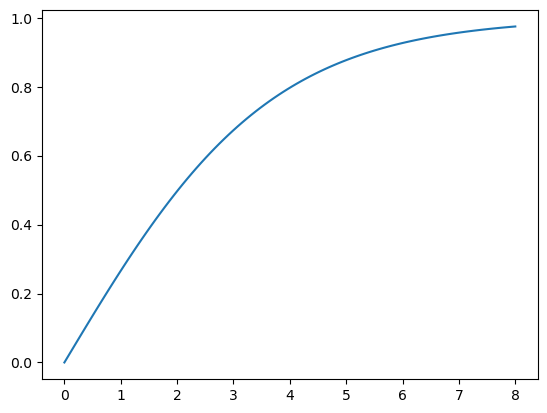

In [16]:
## EQUATION: P_n = tanh(n*sigma_0*l*lambda*P_He) 
# number density n = 3.197*10^19 1/cm^3 (2 bar cell), cell length l = 11 cm, absorption cross section for 1 A sigma_0 = ~3000 barns

%matplotlib inline

lamb = np.linspace(0.0,8,100)
# print(lamb)
P_n = np.tanh(n*sigma_0*l*lamb*P_he*P_rb*f)
# print(P_n)

plt.plot(lamb, P_n)
plt.show()


Energy 0.75 [eV] equivalent to 0.33026 [Angstrom]



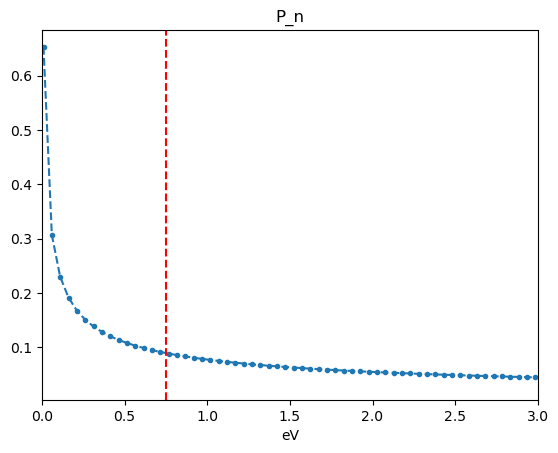

0.08980172269292172


In [17]:
## in energy
# %matplotlib qt

h = 6.62607015e-34  ## joule-seconds
m = 1.67492749804e-27 ## kg
eV_to_J = 1.602176565e-19 ## conversion factor
m_to_A = 1e10 ## m to Angstrom converstion factor

E = np.linspace(0.01,5.0,100) ## eV
p = np.sqrt(2*m*E*eV_to_J)
lamb = h/p*m_to_A
# print(lamb)
E_2 = 0.75
p_2 = np.sqrt(2*m*E_2*eV_to_J)
lamb_2 = h/p_2*m_to_A
print(f'Energy {E_2} [eV] equivalent to {np.round(lamb_2,5)} [Angstrom]\n')
P_n = np.tanh(n*sigma_0*l*lamb*P_he*P_rb*f)
# print(P_n)

E_res = 0.75
p_res_Pn = np.tanh(n*sigma_0*l*(h/(np.sqrt(2*m*E_res*eV_to_J))*m_to_A)*P_he*P_rb*f)
# p_res_Pn = np.tanh(n*sigma_0*l*(h/(np.sqrt(2*m*E_res*eV_to_J))*m_to_A)*P_he*P_rb*f)

# plt.plot(E, P_n)
# plt.show()

plt.figure()
plt.title('P_n')
plt.plot(E, P_n, ls='--', marker='.')
plt.axvline(x = E_res, ls = '--', c = 'r')
plt.xlim(0,3)
plt.xlabel('eV')
plt.show()
print(p_res_Pn)

800
[1.965056e-06 1.965568e-06 1.966080e-06]
7.47595344937969e-13
[0.74755274 0.74716333 0.74677424]
estimate P_n at 0.75 eV: 0.08985456297569278


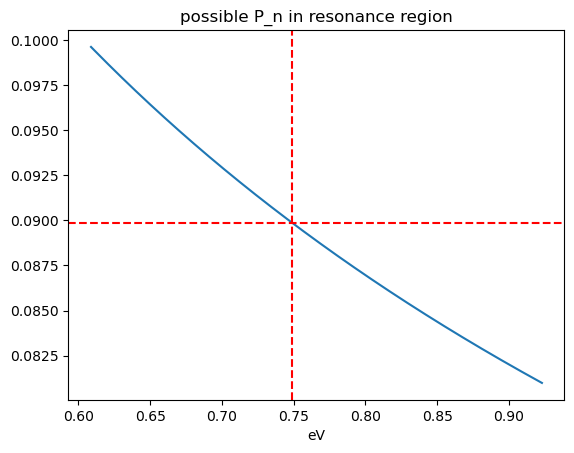

In [18]:
## imitate data region of resonance
%matplotlib inline

x_tof = np.linspace(1.768448e-06, 2.177536e-06, 800)
print(len(x_tof))
print(x_tof[384:387])
print(0.5*(1.6749286*10**(-27))*((23.5/(1.965*1000)))**2*(6.24151*10**18))
t_to_eV_test = 0.5*(1.6749286*10**(-27))*((23.5/(x_tof*1000)))**2*(6.24151*10**18) ##*1000 seems to work
print(t_to_eV_test[384:387])

E_res = t_to_eV_test
p_res = np.sqrt(2*m*E_res*eV_to_J)
lamb_res = h/p_res*m_to_A
# print(lamb)
# print(f'Energy {E_2} [eV] equivalent to {np.round(lamb_2,5)} [Angstrom]\n')
P_n_res = np.tanh(n*sigma_0*l*lamb_res*P_he*P_rb*f)
print(f'estimate P_n at 0.75 eV: {P_n_res[380]}')

plt.title('possible P_n in resonance region')
plt.plot(E_res, P_n_res)
plt.axvline(x = E_res[380], ls = '--', c = 'r')
plt.axhline(y = np.tanh(n*sigma_0*l*lamb_res[380]*P_he*P_rb*f), ls = '--', c = 'r')
plt.xlabel('eV')
plt.show()

# %matplotlib qt
# plt.figure()
# plt.plot(E, P_n, ls='--', marker='.')
# plt.axvline(x = E_res, ls = '--', c = 'r')
# plt.xlim(0,3)
# plt.show()
# print(p_res_Pn)

471
471
[-0.17726 36.25394  0.17812]
[[0.000e+00 1.900e-04 0.000e+00]
 [1.900e-04 1.715e-01 1.400e-04]
 [0.000e+00 1.400e-04 0.000e+00]]
Reduced Chi-squared with errors: 0.26533513770335354


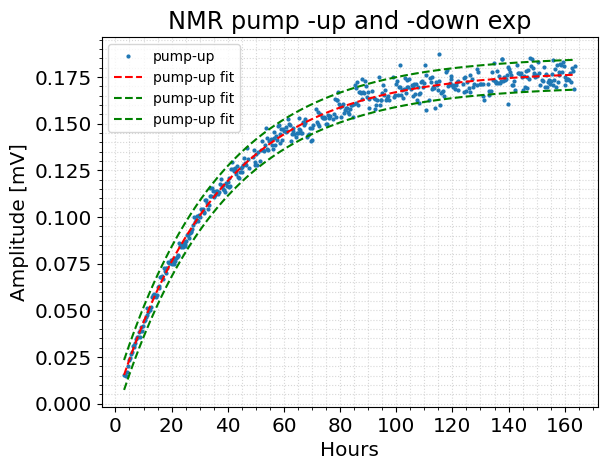

In [19]:
## increase

## decay

x = fin_rt_up
yn = fin_ra_up
ydata = yn

popt, pcov = curve_fit(func_exp, x, yn, p0 = [0.17, 36, 0.0049])
yfit = func_exp(x, *popt)
print(len(yn))
print(len(yfit))
err = 0.008

plt.figure()
plt.plot(x, yn, '.', ms = '4.0', label = 'pump-up')
plt.plot(x, yfit, 'r--', label='pump-up fit')
plt.plot(x, yfit+err, 'g--', label='pump-up fit')
plt.plot(x, yfit-err, 'g--', label='pump-up fit')


print(np.round(popt,5))
print(np.round(pcov,5))

sigma = np.ones(len(ydata))*err ## estimated error...
reduced_chi_squared = reduced_chi2(ydata, yfit, sigma, popt)
print(f"Reduced Chi-squared with errors: {reduced_chi_squared}")

plt.title(rf'NMR pump -up and -down exp', fontsize = 'xx-large')

# plt.xticks(np.arange(-1.0,4.0, 0.5),fontsize = 'large')
plt.grid(True, which='both', alpha = 0.5, ls = ':')
plt.minorticks_on()
plt.xticks(fontsize = 'x-large')
plt.yticks(fontsize = 'x-large')

plt.ylabel('Amplitude [mV]',fontsize = 'x-large')
plt.xlabel('Hours',fontsize = 'x-large')

plt.legend(fontsize = 'medium')
plt.show()

In [20]:
print(np.sqrt(np.sum(residuals**2)))
print(np.mean(residuals))
print(np.sum(np.abs(residuals)))
print(np.mean(np.abs(residuals)))
print((np.mean(np.abs(residuals)))*2)
print(dof)
# print(residuals)
print((np.sqrt(np.sum(residuals**2)))/dof)
print(pcov)

0.07338660500560949
-1.9187475002093246e-12
1.1808639117346806
0.0021049267588853487
0.004209853517770697
558
0.0001315172132717016
[[8.45606216e-07 1.87800397e-04 1.35026429e-08]
 [1.87800397e-04 1.71499959e-01 1.39042475e-04]
 [1.35026429e-08 1.39042475e-04 1.78866743e-07]]


In [21]:
Nexp = func(xdata, *popt)
# r = N - Nexp
r = residuals
stdev = np.std(np.abs(residuals))

chisq = np.sum((r/stdev)**2)
df = dof
print("chisq =",chisq,"df =",df)

chisq = 1041.8475763783463 df = 558


In [22]:
print(np.std(np.abs(residuals)))
stdev = np.std(np.abs(residuals))
print(np.sqrt(stdev))

0.002273603368616501
0.04768231714814729


In [23]:
# from scipy import odr

# import numpy as np

# x = np.linspace(0.0, 5.0)

# y = -10.0 + np.exp(0.5*x)
# data = odr.Data(x, y)

# odr_obj = odr.ODR(data, odr.exponential)

# output = odr_obj.run()

# print(y)
# print(output)
# print(output.beta)
# plt.plot(x,y)

In [24]:
# x = np.array([1, 7, 20, 50, 79])
# y = np.array([10, 19, 30, 35, 51])
# np.polyfit(np.log(x), y, 1)
# # array([ 8.46295607,  6.61867463])